In [1]:
from strsimpy.normalized_levenshtein import NormalizedLevenshtein

normalized_levenshtein = NormalizedLevenshtein()
print(normalized_levenshtein.distance('My string', 'My $string'))
print(normalized_levenshtein.distance('My string', 'My $string'))
print(normalized_levenshtein.distance('My string', 'My $string'))

print(normalized_levenshtein.similarity('My string', 'My $string'))
print(normalized_levenshtein.similarity('My string', 'My $string'))
print(normalized_levenshtein.similarity('My string', 'My $string'))
# get original transcript


0.1
0.1
0.1
0.9
0.9
0.9


In [2]:

transcript_id = '10_0991_331330'
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer

def read_transcript_from_id(transcript_id):

    path_to_data_folder = '/archive/shared/sim_center/shared/ameer/'
    # lookinto this dictionary to find the path
    # can also manually create the path and it would be faster but not by much
    merged_lookup = pd.read_csv(path_to_data_folder + 'grade_lookupv5.csv')
    transcript = ''

    path = merged_lookup[merged_lookup.id == transcript_id].path.iloc[0]
    with open(path, 'r') as file:
        lines = file.readlines()
    for line in lines:
        if line != '\n':
            tok_line = line.split(' ')
            for i in range(len(tok_line)):
                transcript += ' ' + tok_line[i]


    return transcript
 

In [3]:
transcript = read_transcript_from_id(transcript_id)
print(transcript)

diarized_transcript = '/archive/shared/sim_center/shared/annie/GPT4 3-chunk/'
id = '10_0991_331330'
def reconstruct_transcript(path, id): 
    transcript = ''
    path = path + id + '.txt'
    with open(path, 'r') as file:
        lines = file.readlines()
    for line in lines[1:]:
        if line != '\n':
            tok_line = line.split(' ')
            for i in range(1,len(tok_line)):
                transcript += ' ' + tok_line[i]
    
    resid_lines = transcript.split('\n')
    transcript = ''
    for line in resid_lines:
        transcript += line

    return transcript


  Learners, you may begin your patient station, remove your cover sheet, jot down any... Thank you. Come in. Come on in, man. Hello, Mr. Pimbleton. Hi, my name is Coleman. I'm a medical student at UT Southwestern. I am here to ask you some questions. I just want to know how you are feeling today. I've been feeling sick to my stomach. Now I throw one up, I feel not good. Okay, when did this start? It started getting nauseous. I was feeling nausea. I had a stomachache. I felt nause up. I am not good. Okay, when did this start? I started getting nauseous two days ago. Threw up the first time yesterday after breakfast, about 20 minutes after I ate. Any other episodes of vomiting? Yeah, I threw up three or four times yesterday and then after breakfast today about five minutes after I ate. Okay. And what does your vomit look like? It's just small bits of undigested food, whatever I eat. Any blood in it? No. No? No Bile? No Just the chunks of food? No Okay Now this has been going on for just 

In [4]:
def eval_transcript(ids, path):
    scores = {}
    for id in ids:
        print(id)
        transcript = read_transcript_from_id(id)
        reconstructed_transcript = reconstruct_transcript(path, id)
        distance = normalized_levenshtein.distance(transcript, reconstructed_transcript)
        similarity = normalized_levenshtein.similarity(transcript, reconstructed_transcript)
        scores[id] = [distance, similarity]
    return scores

In [15]:
this_id = ['10_0991_331330']
diar_path = '/archive/shared/sim_center/shared/annie/claude/'
claude_score = eval_transcript(this_id, diar_path)
diar_path='/archive/shared/sim_center/shared/annie/GPT4 3-chunk/'
gpt4_score = eval_transcript(this_id, diar_path)

10_0991_331330


10_0991_331330


In [16]:
claude_score

{'10_0991_331330': [0.018380394246137452, 0.9816196057538625]}

In [17]:
gpt4_score

{'10_0991_331330': [0.06513052743740011, 0.9348694725625999]}

In [6]:
ids = ['01_0542_298135',
'02_0036_174595',
'03_0028_174553',
'04_0043_174686',
'05_0033_174804',
'06_0079_175106',
'07_0068_174641',
'08_0029_174576',
'09_0029_174582',
'10_0991_331330']

gpt35_path = '/archive/shared/sim_center/shared/annie/GPT3.5 complete/'
mixtral_path = '/archive/shared/sim_center/shared/annie/mixtral/'
gpt4_path = '/archive/shared/sim_center/shared/annie/GPT4 complete (json split)/'
gpt4_3chunk = '/archive/shared/sim_center/shared/annie/GPT4 3-chunk/'
gpt4_6chunk = '/archive/shared/sim_center/shared/annie/GPT4 6-chunk/'
gpt4_9chunk = '/archive/shared/sim_center/shared/annie/GPT4 9-chunk/'

In [ ]:
#CSV OUTPUTS FROM THIS SAVED IN FOLDER

reconstructed = reconstruct_transcript(diarized_transcript, id)
reconstructed
normalized_levenshtein.distance(transcript, reconstructed)
normalized_levenshtein.similarity(transcript, reconstructed)
normalized_levenshtein.distance(transcript, transcript)

#Run for all IDs
# IDs for the test/sample transcripts

    
gpt4_init = eval_transcript(ids, gpt4_path)
gpt4_df = pd.DataFrame(gpt4_init)
gpt4_df.to_csv("gpt4_init.csv")
mixtral_init = eval_transcript(ids, mixtral_path)
pd.DataFrame(mixtral_init).to_csv("mixtral_init.csv")
gpt35_init = eval_transcript(ids, gpt35_path)
pd.DataFrame(gpt35_init).to_csv("gpt35_init.csv")
gpt4_dists = []
gpt35_dists = []
mixtral_dists = []
gpt4_sim = []
gpt35_sim = []
mixtral_sim = []

for id in ids:
    gpt4_sim.append(gpt4_init[id][1])
    gpt4_dists.append(gpt4_init[id][0])
    gpt35_sim.append(gpt35_init[id][1])
    gpt35_dists.append(gpt35_init[id][0])
    mixtral_sim.append(mixtral_init[id][1])
    mixtral_dists.append(mixtral_init[id][0])

gpt4_sim
columns = ['COSCE ID', 'gpt4 sim', 'gpt4 dist', 'gpt35 sim', 'gpt35 dist', 'mixtral sim', 'mixtral dist']
all_df = pd.DataFrame(zip(ids, gpt4_sim, gpt4_dists, gpt35_sim, gpt35_dists, mixtral_sim, mixtral_dists), columns=columns)
all_df
all_df.to_csv("levenshtein_gpt4_35_mixtral.csv")

import matplotlib.pyplot as plt
import numpy as np
avg_dists = [np.mean(gpt4_dists), np.mean(gpt35_dists), np.mean(mixtral_dists)]
avg_sim = [np.mean(gpt4_sim), np.mean(gpt35_sim), np.mean(mixtral_sim)]
models = ['gpt4', 'gpt35', 'mixtral']
plt.bar(models, avg_dists)
plt.ylim(0, 1)
plt.title("normalized levenshtein distance")
plt.show()

plt.bar(models, avg_sim)
plt.ylim(0, 1)
plt.title("normalized levenshtein similarity")
plt.show()

Running for different chunk sizes

In [7]:
gpt4_3chunk_init = eval_transcript(ids, gpt4_3chunk)
pd.DataFrame(gpt4_3chunk_init).to_csv("gpt4_3chunk.csv")

gpt4_6chunk_init = eval_transcript(ids, gpt4_6chunk)
pd.DataFrame(gpt4_6chunk_init).to_csv("gpt4_6chunk.csv")

gpt4_9chunk_init = eval_transcript(ids, gpt4_9chunk)
pd.DataFrame(gpt4_9chunk_init).to_csv("gpt4_9chunk.csv")

01_0542_298135
02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582
10_0991_331330
01_0542_298135
02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582
10_0991_331330
01_0542_298135
02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582
10_0991_331330


In [9]:
dists_3chunk = []
dists_6chunk = []
dists_9chunk = []
sim_3chunk = []
sim_6chunk = []
sim_9chunk = []

for id in ids:
    sim_3chunk.append(gpt4_3chunk_init[id][1])
    dists_3chunk.append(gpt4_3chunk_init[id][0])
    sim_6chunk.append(gpt4_6chunk_init[id][1])
    dists_6chunk.append(gpt4_6chunk_init[id][0])
    sim_9chunk.append(gpt4_9chunk_init[id][1])
    dists_9chunk.append(gpt4_9chunk_init[id][0])

columns = ['COSCE ID', '3chunk sim', '3chunk dist', '6chunk sim', '6chunk dist', '9chunk sim', '9chunk dist']
all_chunks = pd.DataFrame(zip(ids, sim_3chunk, dists_3chunk, sim_6chunk, dists_6chunk, sim_9chunk, dists_9chunk), columns=columns)
all_chunks.to_csv("levenshtein_3_6_9.csv")

In [8]:
# redo 3-chunk because there was a path mistake
#gpt4_3chunk_init = eval_transcript(ids, gpt4_3chunk)
#pd.DataFrame(gpt4_3chunk_init).to_csv("gpt4_3chunk.csv")

01_0542_298135
02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582
10_0991_331330


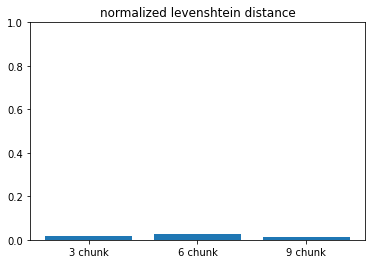

In [10]:
import matplotlib.pyplot as plt
import numpy as np
avg_dists = [np.mean(dists_3chunk), np.mean(dists_6chunk), np.mean(dists_9chunk)]
avg_sim = [np.mean(sim_3chunk), np.mean(sim_6chunk), np.mean(sim_9chunk)]
models = ['3 chunk', '6 chunk', '9 chunk']
plt.bar(models, avg_dists)
plt.ylim(0, 1)
plt.title("normalized levenshtein distance")
plt.show()

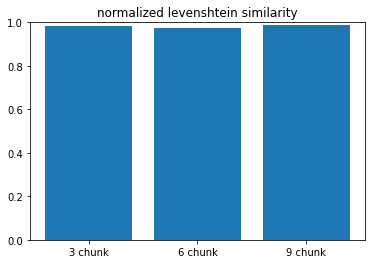

In [11]:
plt.bar(models, avg_sim)
plt.ylim(0, 1)
plt.title("normalized levenshtein similarity")
plt.show()